In [ ]:
print('SLOGAN GENERATION FOR POLITICAL PARTIES : ')

SLOGAN GENERATION FOR POLITICAL PARTIES : 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
import pickle
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/indian_political_slogans_5000.csv")
slogans = df['Slogan'].dropna().astype(str).tolist()
print("Total slogans:", len(slogans))

Total slogans: 5000


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(slogans)

total_words = len(tokenizer.word_index) + 1
print("Vocabulary size:", total_words)


Vocabulary size: 648


In [ ]:
input_sequences = []
for line in slogans:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print("X shape:", X.shape, " y shape:", y.shape)

NameError: name 'slogans' is not defined

In [ ]:
model = Sequential([
    Embedding(total_words, 128, input_length=max_seq_len-1),
    GRU(128, return_sequences=False),
    Dropout(0.2),
    Dense(total_words, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(X, y, epochs=30, batch_size=128, validation_split=0.1, verbose=1)

Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - accuracy: 0.0638 - loss: 5.4048 - val_accuracy: 0.2653 - val_loss: 3.6079
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.4062 - loss: 2.9307 - val_accuracy: 0.7606 - val_loss: 1.4122
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.7792 - loss: 1.1890 - val_accuracy: 0.8243 - val_loss: 0.8426
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - accuracy: 0.8275 - loss: 0.7507 - val_accuracy: 0.8344 - val_loss: 0.6750
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.8478 - loss: 0.5695 - val_accuracy: 0.8423 - val_loss: 0.6011
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.8543 - loss: 0.4898 - val_accuracy: 0.8393 - val_loss: 0.5556
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.8575 - loss: 0.4553 - val_accuracy: 0.8485 - val_loss: 0.5273
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.8591 - loss: 0.4166 - 

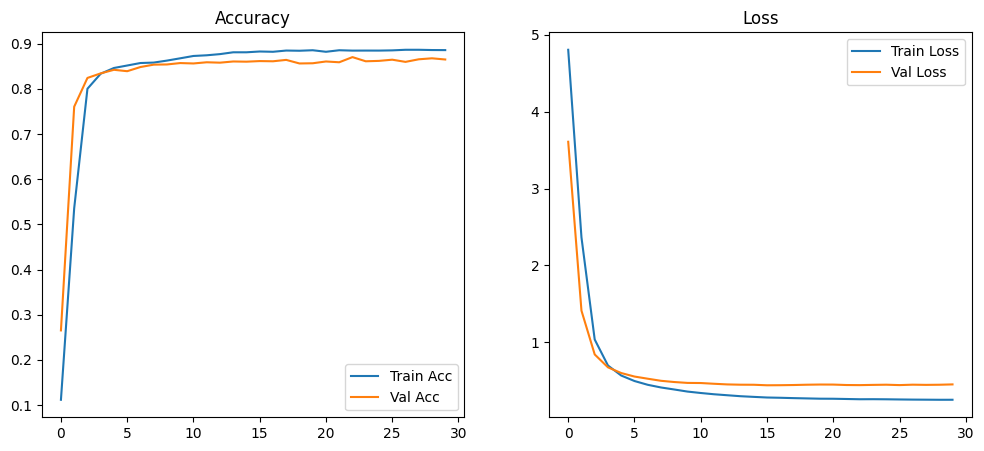

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend(), plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend(), plt.title("Loss")

plt.show()

In [ ]:
model.save("slogan_model.h5")
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved ")

In [ ]:
model = load_model("slogan_model.h5")
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

max_seq_len = 200

In [ ]:
def generate_slogan(seed_text, next_words=8, temperature=1.0):
    output_text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([output_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

        predictions = model.predict(token_list, verbose=0)[0]

        preds = np.log(predictions + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        predicted_id = np.random.choice(len(preds), p=preds)

        for word, index in tokenizer.word_index.items():
            if index == predicted_id:
                output_text += " " + word
                break
    return output_text

In [ ]:
print(generate_slogan("yuva", next_words=4, temperature=1.0))
print(generate_slogan("roti", next_words=4, temperature=1.2))

yuva shakti desh ki shakti
roti kapda makaan sabke liye


In [ ]:
print(generate_slogan("akhilesh", next_words=4, temperature=0.5))
print(generate_slogan("beti", next_words=3, temperature=1.0))

akhilesh ka jalwa kayam hai
beti bachao beti padhao


In [ ]:
print(generate_slogan("farmer", next_words=5, temperature=1.0))

farmer ka matlab janta ki sarkar


In [ ]:
print(generate_slogan("congress", next_words=7, temperature=1.0))

bjp ko harana hai desh ko bachana hai


In [ ]:
print(generate_slogan("tax", next_words=5, temperature=1.2))

tax se mukti janata ki shakti


In [ ]:
print(generate_slogan("jawan", next_words=5, temperature=1.2))

jawan ki izzat desh ki shaan


In [ ]:
print(generate_slogan("bihar", next_words=4, temperature=1.2))

bihar first always first 2025


In [ ]:
print(generate_slogan("maharashtra", next_words=4, temperature=0.8))

maharashtra se vikas sabka saath


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle

save_dir = "/content/drive/MyDrive/lstm_project/"

model.save(save_dir + "lstm_model.h5")

with open(save_dir + "tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print(" Model and tokenizer saved in Google Drive ")


MessageError: Error: credential propagation was unsuccessful